#### Execution of various deconvolution methods using LM6
- parameters were optimized with GSE107572
- Note that GSE107572 is **human hematology** data

1. Neutrophils
2. Monocytes
3. B cells
4. CD8 T cells
5. CD4 T cells
6. NK cells

In [1]:
Base_dir = 'C:/github/LiverDeconv' # cloning repository

import sys
sys.path.append(Base_dir)
import liver_deconv
from _utils import processing
from _utils import plot4deconv as p4d
from Evaluation import evaluator
import pandas as pd

***
#### ① Elastic Net (alpha=1,L1_ratio=0.05)

(11588, 57)
(51463, 62)
log2 conversion
quantile normalization
drop nan
narrowd gene number : 11490
signature genes : 300
0 rows are removed
0 rows are removed
number of used genes = 300
fitting method : ElasticNet


c:\Users\Mizu2020\piphazuma\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


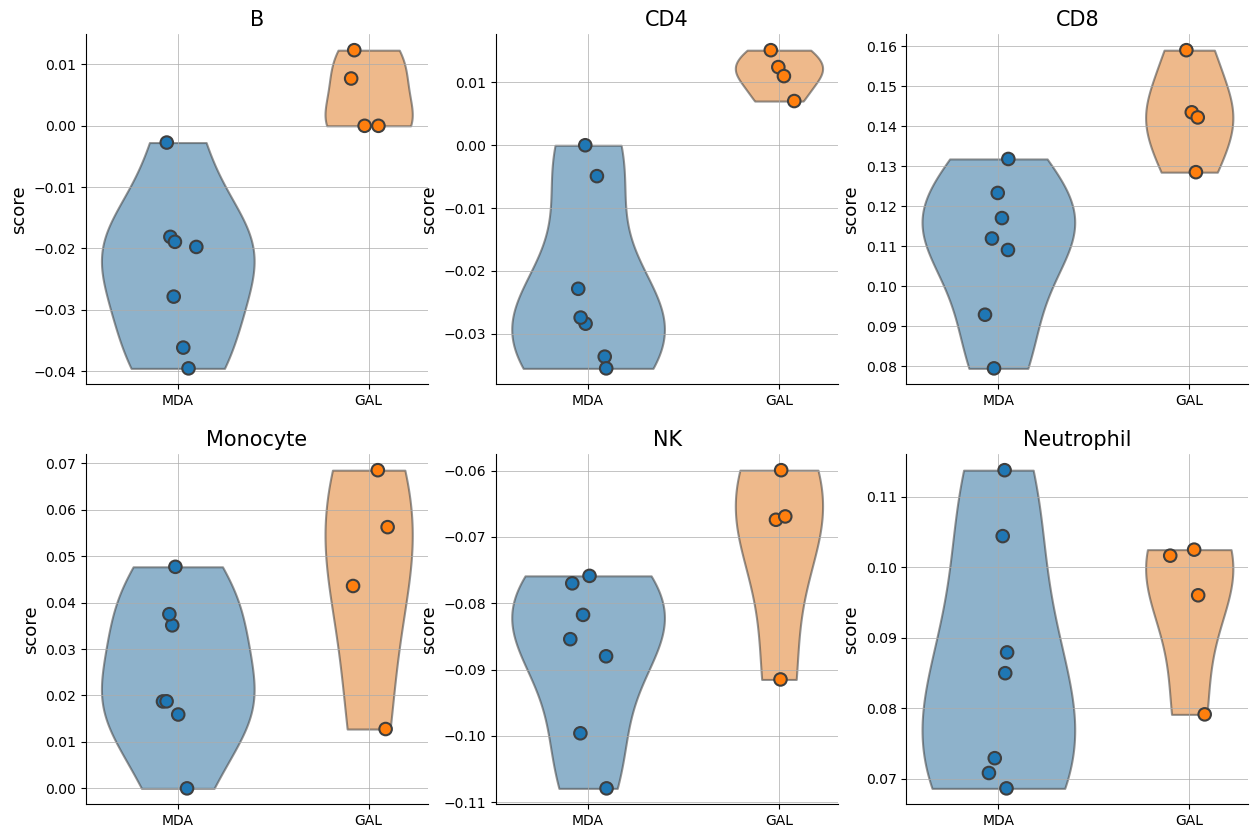

standardz population control
original : 57
after removing : 54
standardz population control
----------


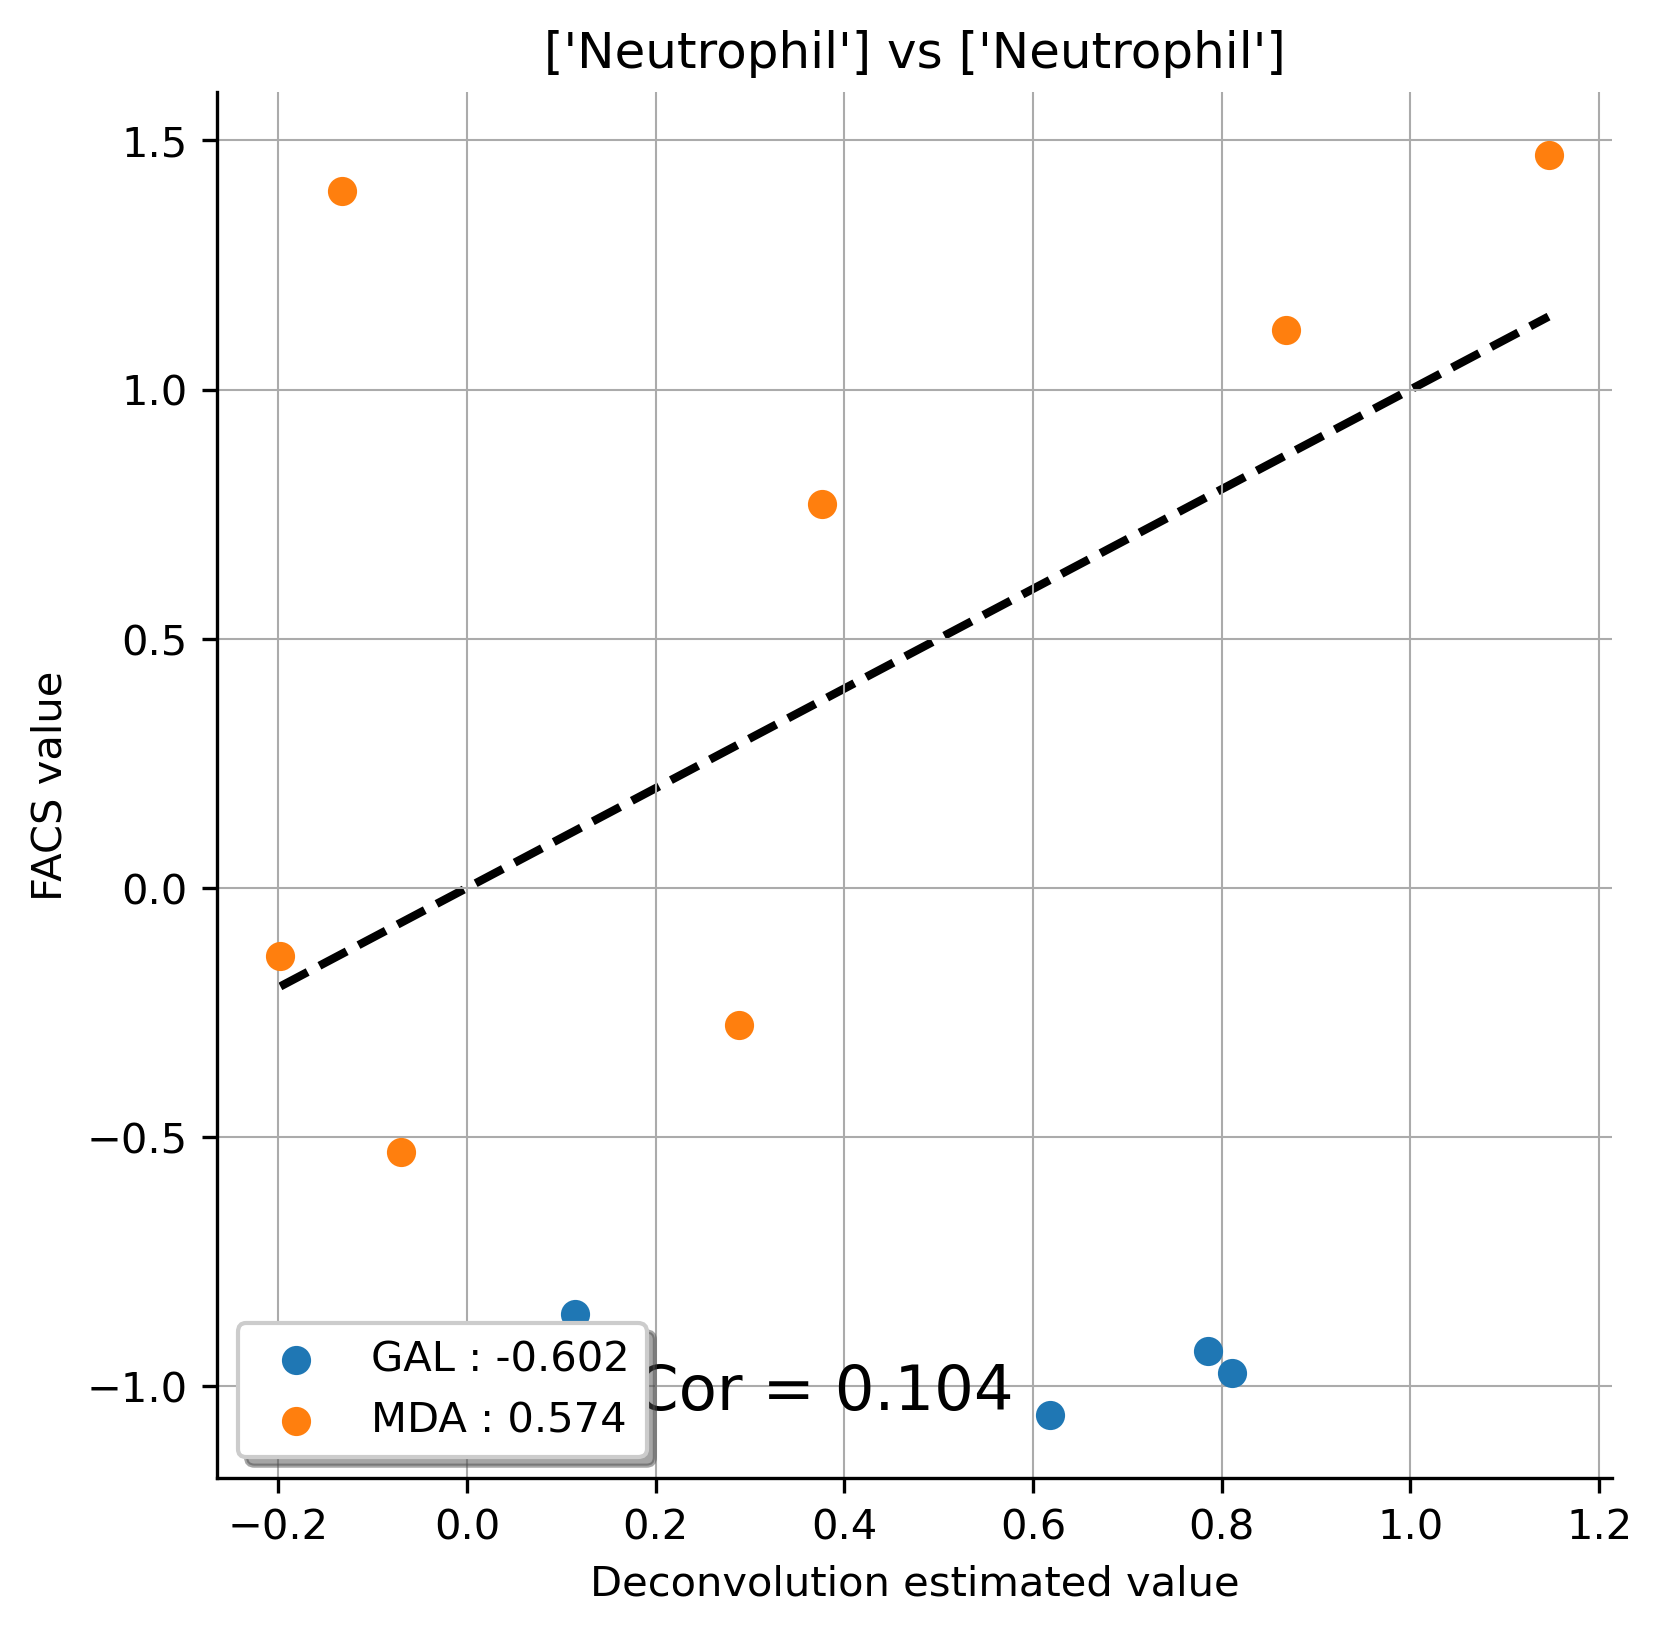

----------


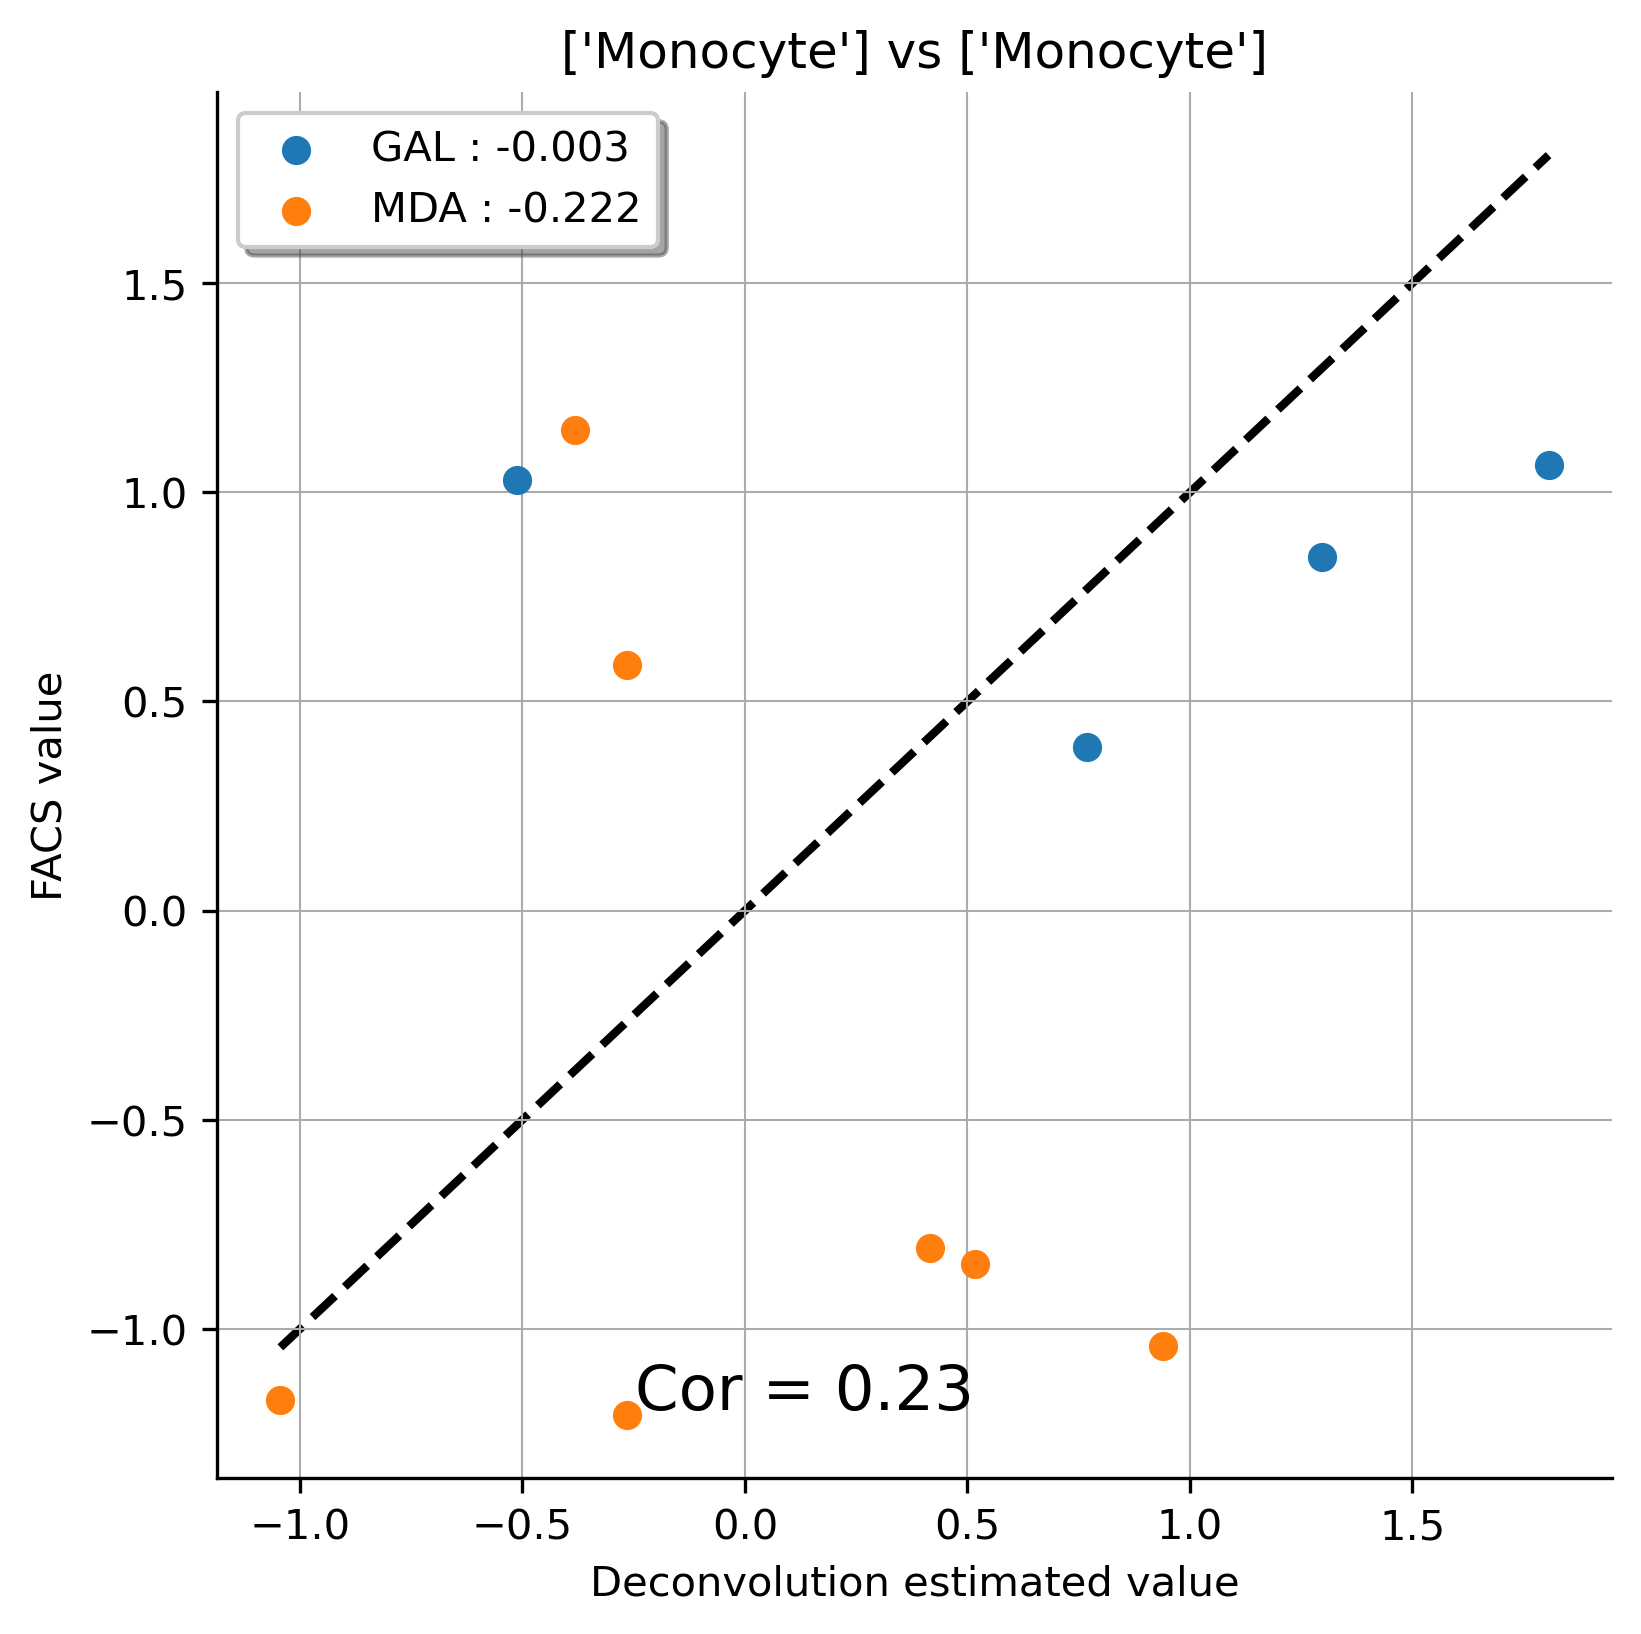

----------


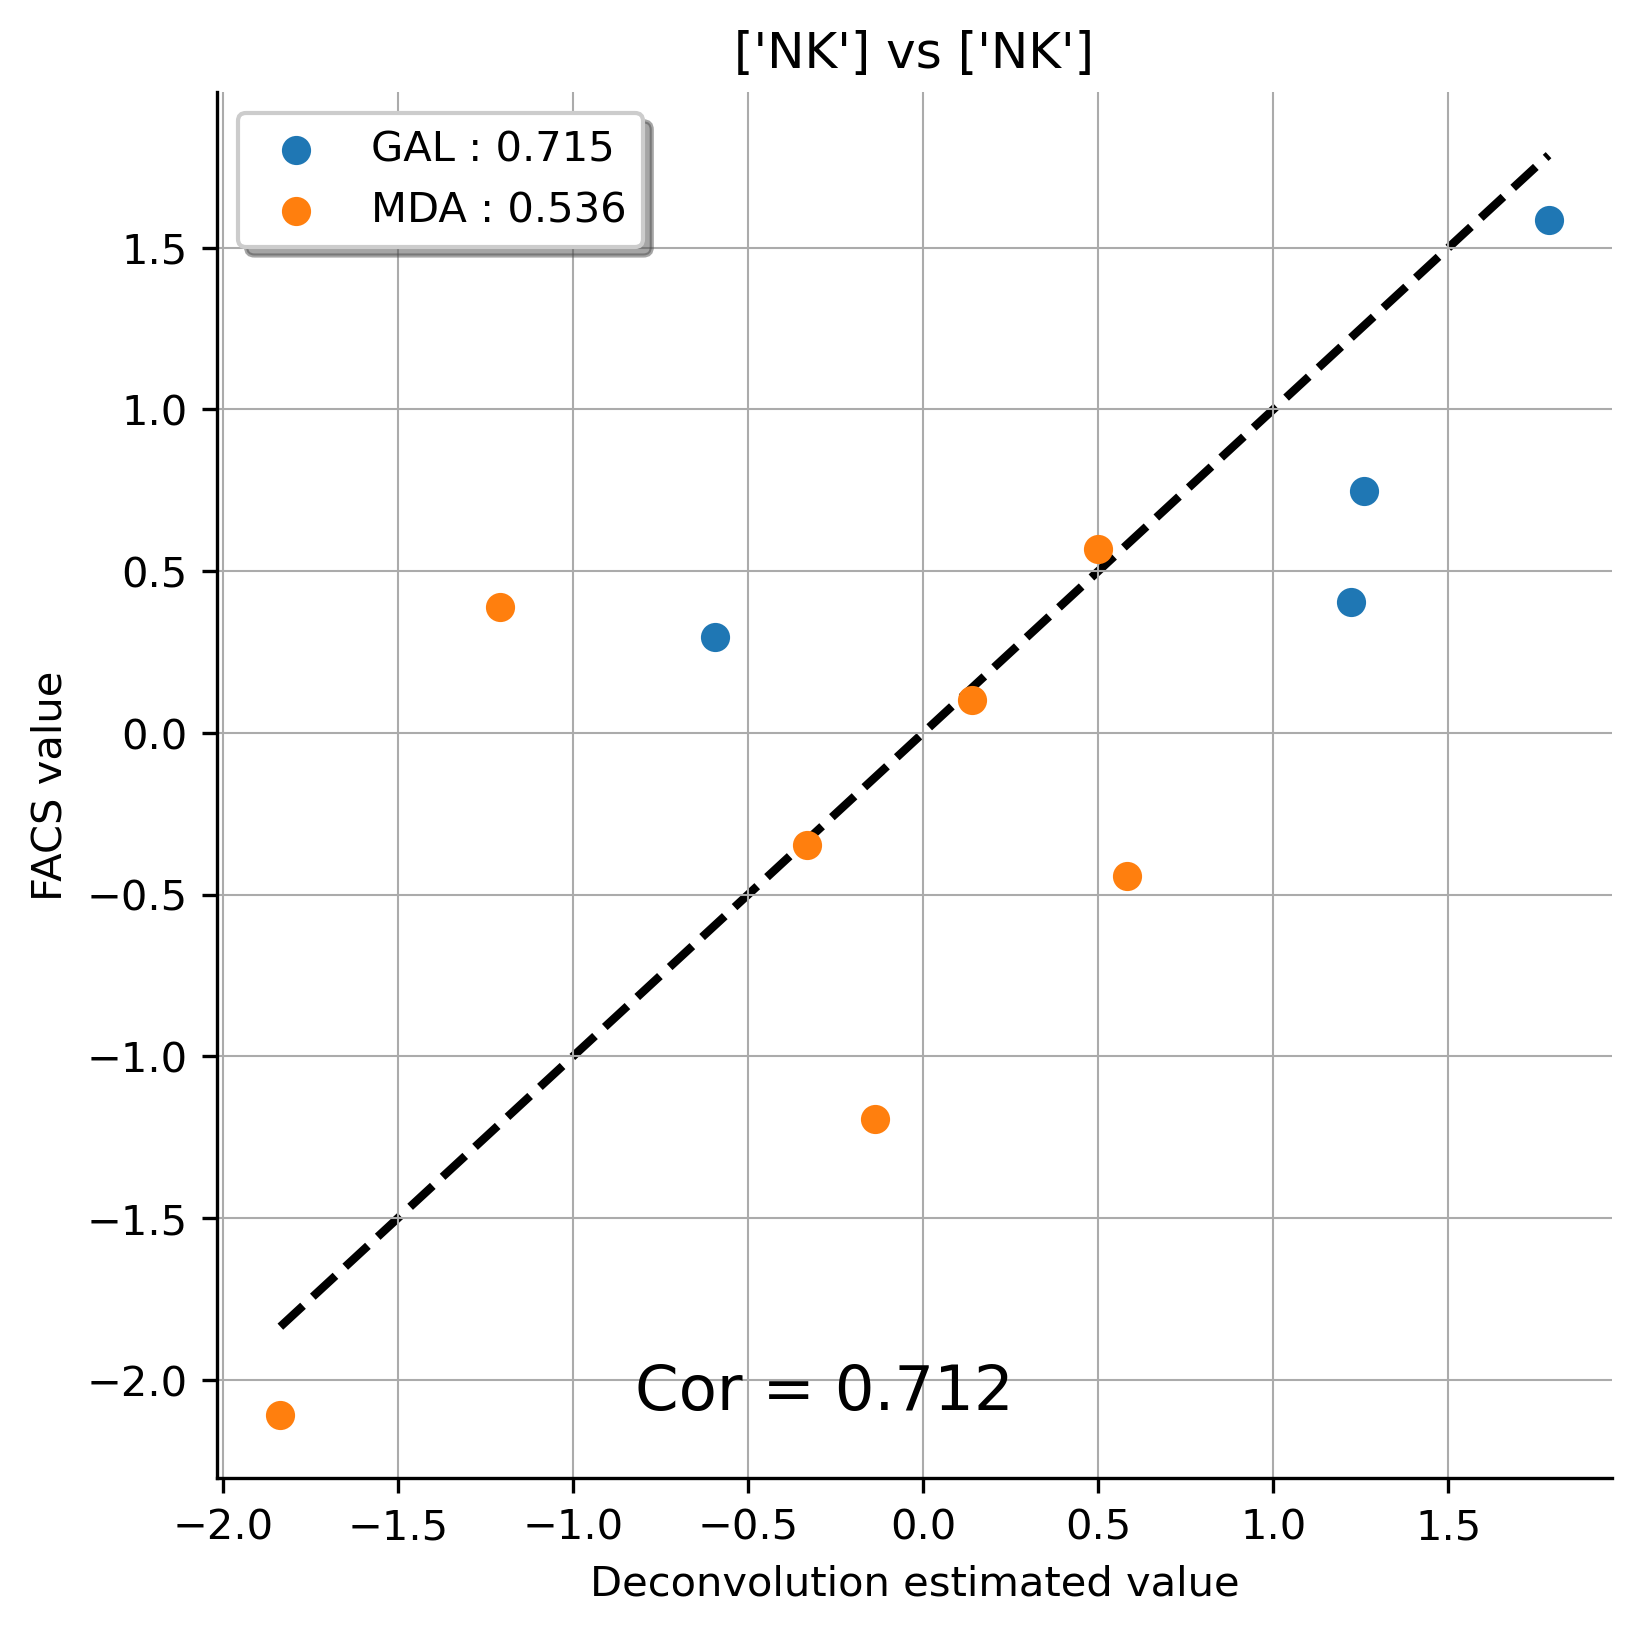

In [2]:
#%% Elastic Net
# load data
df_mix = pd.read_csv(Base_dir+'/data/processed/mix_processed.csv',index_col=0)
df_all = pd.read_csv(Base_dir+'/data/processed/ref_13types.csv',index_col=0)

target_cells = ["Neutrophil","Monocyte","B","CD8","CD4","NK"]
use_samples = []
for t in df_all.columns.tolist():
    if t.split("_")[0] in target_cells:
        use_samples.append(t)
df_target = df_all[use_samples]

dat = liver_deconv.LiverDeconv()
dat.set_data(df_mix=df_mix, df_all=df_target)
dat.pre_processing(do_ann=False,ann_df=None,do_log2=True,do_quantile=True,do_trimming=False,do_drop=True)
dat.narrow_intersec()
dat.create_ref(sep="_",number=50,limit_CV=10,limit_FC=1.5,log2=False,verbose=True,do_plot=False)

# perform
dat.do_fit(method="ElasticNet",alpha=1,l1_ratio=0.05)
dat.summarize(row_n=2,col_n=3,z_score=False)
res = dat.get_res()

# evaluation
ev = evaluator.Evaluator()
ev.set_deconv_res(res_df=res,z_score=True)
ev.remove_samples(remove_list=["APAP_1","CIV_7","CIV_8","CIP_7","CIP_8"])
ev.set_validation_ref()
ev.process_validation_ref(z_score=True)
val = ev.target_val_ref
ev.evaluate(dec_names=[["Neutrophil"]],
            val_names=[["Neutrophil"]],do_plot=True)
ev.evaluate(dec_names=[["Monocyte"]],
            val_names=[["Monocyte"]],do_plot=True)
ev.evaluate(dec_names=[["NK"]],
            val_names=[["NK"]],do_plot=True)